In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dfeffort = pd.DataFrame.from_csv('effort.csv')
dfweather = pd.DataFrame.from_csv('weather.csv')
dfdrought = pd.DataFrame.from_csv('drought.csv')
dfheavyPrecip = pd.DataFrame.from_csv('heavy-precip.csv')
dfprecip = pd.DataFrame.from_csv('precipitation.csv')
dftemperature = pd.DataFrame.from_csv('temperature.csv')
dfbald_eagle = pd.DataFrame.from_csv('bald_eagle_counts.csv')
dfchickadee = pd.DataFrame.from_csv('chickadee_counts.csv')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that som

# Examine bird populations

Let's have a look at the normalized bird densities (the number of observations over the number of man hours in that year's cbc) seen over the years with the cbc. 


### Bald Eagle: black
### Chickadee: red

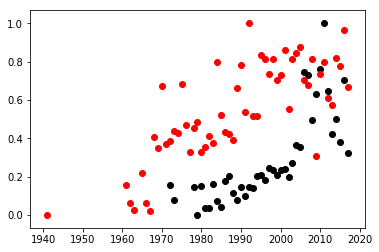

In [30]:
plt.scatter(dfbald_eagle.year, dfbald_eagle.density/max(dfbald_eagle[dfbald_eagle.year > 1980].density), color='k')
plt.scatter(dfchickadee.year, dfchickadee.density/max(dfchickadee.density), color='r')

# Begin Making model


We will try to predict the density of bird observations based on the various weather criteria, plotted together below.

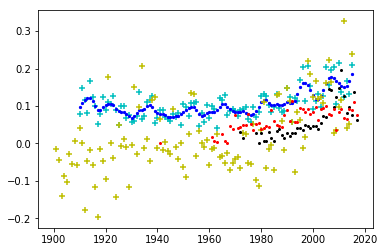

In [31]:
plt.scatter(dfheavyPrecip.year, dfheavyPrecip.index_value, color='c', marker='+')
plt.scatter(dfheavyPrecip.year, dfheavyPrecip.nine_yr_avg, color='b', s=5)
plt.scatter(dftemperature.year, dftemperature.earth_surface/10, color='y', marker='+')
plt.scatter(dfbald_eagle.year, dfbald_eagle.density, color='k', s=4)
plt.scatter(dfchickadee.year, dfchickadee.density/100, color='r', s=4)

# construct Y_chickadee

Use dictionaries with years associated to be careful.

### Start with chickadee only

... because the data is a little more complete.  Lets drop countYear 42 (1941) and just use 1961 and on.

In [63]:
dfchickadee = dfchickadee[dfchickadee.year > 1960]
Y_chickadee = np.array(dfchickadee.density.tolist())
Y_chickadee_dict = dict()
for i in range(len(dfchickadee)):
    Y_chickadee_dict[dfchickadee.iloc[i].year] = dfchickadee.iloc[i].density


In [64]:
Y_chickadee_dict

{1961: 1.7931,
 1962: 0.697,
 1963: 0.2857,
 1965: 2.5,
 1966: 0.7143,
 1967: 0.2143,
 1968: 4.5833,
 1969: 3.9286,
 1970: 7.6,
 1971: 4.1667,
 1972: 4.3939,
 1973: 4.9545,
 1974: 4.8361,
 1975: 7.7294,
 1976: 5.3162,
 1977: 3.7091,
 1978: 5.1408,
 1979: 5.5106,
 1980: 3.7282,
 1981: 4.0282,
 1982: 4.6519,
 1983: 4.2698,
 1984: 9.0147,
 1985: 5.9318,
 1986: 4.8973,
 1987: 4.7685,
 1988: 4.4552,
 1989: 7.5078,
 1990: 8.8803,
 1991: 6.0987,
 1992: 11.3314,
 1993: 5.8231,
 1994: 5.8456,
 1995: 9.4302,
 1996: 9.2156,
 1997: 8.3404,
 1998: 9.2165,
 1999: 7.9538,
 2000: 8.2908,
 2001: 9.731,
 2002: 6.232,
 2003: 9.2267,
 2004: 9.5665,
 2005: 9.9516,
 2006: 7.9725,
 2007: 7.6872,
 2008: 9.2347,
 2009: 3.505,
 2010: 8.3573,
 2011: 9.0652,
 2012: 6.9145,
 2013: 6.5077,
 2014: 9.2757,
 2015: 8.8134,
 2016: 10.9501,
 2017: 7.5415}

In [68]:
dfbald_eagle = dfbald_eagle[dfbald_eagle.year > 1980]
Y_bald_eagle = np.array(dfbald_eagle.density.tolist())
Y_bald_eagle_dict = dict()
for i in range(len(dfbald_eagle)):
    Y_bald_eagle_dict[dfbald_eagle.iloc[i].year] = dfbald_eagle.iloc[i].density



In [70]:
Y_bald_eagle
Y_bald_eagle_dict

{1981: 0.007,
 1982: 0.0074,
 1983: 0.0317,
 1984: 0.0147,
 1985: 0.0076,
 1986: 0.0342,
 1987: 0.0394,
 1988: 0.0224,
 1989: 0.0156,
 1990: 0.0282,
 1991: 0.0197,
 1992: 0.0286,
 1993: 0.0272,
 1994: 0.0403,
 1995: 0.0407,
 1996: 0.0359,
 1997: 0.0479,
 1998: 0.0464,
 1999: 0.041,
 2000: 0.0459,
 2001: 0.0468,
 2002: 0.0387,
 2003: 0.0533,
 2004: 0.0719,
 2005: 0.0699,
 2006: 0.1466,
 2007: 0.143,
 2008: 0.0969,
 2009: 0.1238,
 2010: 0.1489,
 2011: 0.1961,
 2012: 0.1265,
 2013: 0.0824,
 2014: 0.0981,
 2015: 0.0747,
 2016: 0.1378,
 2017: 0.0632}